In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import model_selection

## Data Understanding 

In [2]:
#Loading the data
Train_data=pd.read_csv('train.csv')

In [3]:
# With a sub-sample of 10-20% of the training data (see note below), you should expect to get an accuracy of more than 90%.
Sample_Train_data=Train_data.sample(frac=0.20,random_state=1)

In [4]:
Sample_Train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Sample_Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,8400.0,4.441071,2.904989,0.0,2.0,4.0,7.0,9.0
pixel0,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel6,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel7,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel8,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
Sample_Train_data.shape

(8400, 785)

In [9]:
#Missing Value treatment
#Function to check null values
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'null_count',1:'null_percentage'}).\
sort_values(by='null_percentage',ascending=False)
    return df

In [10]:
null_summary(Sample_Train_data)

,null_count,null_percentage
label,0.0,0.0
pixel515,0.0,0.0
pixel517,0.0,0.0
pixel518,0.0,0.0
pixel519,0.0,0.0
pixel520,0.0,0.0
pixel521,0.0,0.0
pixel522,0.0,0.0
pixel523,0.0,0.0
pixel524,0.0,0.0


In [11]:
order= list(np.sort(Sample_Train_data['label'].unique()))
order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
label_means = Sample_Train_data.groupby('label').mean()
label_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


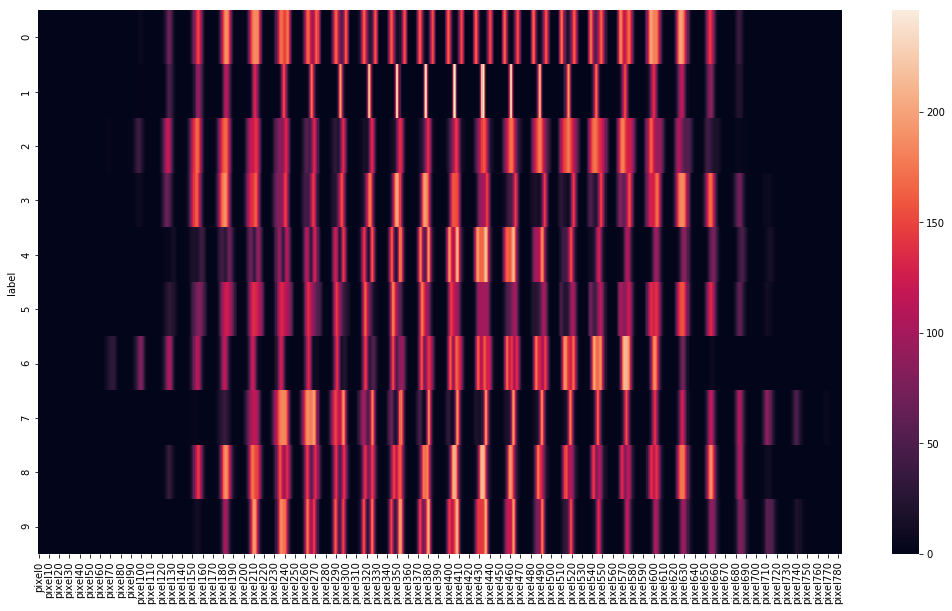

In [13]:
plt.figure(figsize=(18, 10))
sns.heatmap(label_means)

## Data Preparation

In [14]:
# Split the data
X=Sample_Train_data.drop(['label'],axis=1)
y=Sample_Train_data.label.values

In [15]:
print(X.shape)
print(y.shape)

(8400, 784)
(8400,)


In [16]:
# Scaling the feature
X_Scaled=scale(X)

In [17]:
# Spliting the data into train test
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size = 0.3, random_state = 101)

## Model Building

In [18]:
# Linear Model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [19]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9087301587301587 

[[251   0   0   0   3   3   1   0   1   0]
 [  0 263   1   1   0   0   1   0   2   0]
 [  2   2 219   8   2   0   4   0   4   0]
 [  1   1  11 216   0  13   0   2   9   1]
 [  0   0   2   0 248   1   2   1   0   4]
 [  0   2   4  17   4 196   2   2   6   2]
 [  3   0   3   1   4   1 227   0   0   0]
 [  0   1   2   1   6   0   0 243   0  12]
 [  2   6   2  10   1  14   0   2 210   4]
 [  1   0   0   3  10   0   0  19   0 217]]


#### The linear model gives approx. 90% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [20]:
# Non-linear Model

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9301587301587302 

[[251   0   2   0   2   1   2   0   1   0]
 [  0 264   1   1   0   0   1   0   1   0]
 [  1   1 226   5   2   0   2   0   4   0]
 [  0   1  13 224   0   3   0   4   7   2]
 [  0   1   5   0 238   1   2   3   0   8]
 [  0   1   3   8   1 216   1   2   1   2]
 [  2   0   5   0   2   1 229   0   0   0]
 [  0   1   6   0   4   0   0 245   0   9]
 [  3   4   2   5   0   2   0   1 229   5]
 [  1   0   3   3   5   1   0  15   0 222]]


#### The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

In [22]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 61.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [23]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,62.288867,0.465133,8.063626,0.043438,1,0.01,"{'C': 1, 'gamma': 0.01}",0.731293,0.708333,0.741497,...,0.734184,0.017215,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,17.165887,0.095317,5.038875,0.028538,1,0.001,"{'C': 1, 'gamma': 0.001}",0.930272,0.918367,0.933673,...,0.929082,0.007127,4,0.970663,0.974277,0.973639,0.974702,0.974490,0.973554,0.001489
2,25.930194,0.077852,6.649505,0.005967,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.902211,0.887755,0.890306,...,0.896429,0.008321,8,0.914116,0.915179,0.916667,0.917942,0.910927,0.914966,0.002401
3,63.368219,0.355938,8.051657,0.029198,10,0.01,"{'C': 10, 'gamma': 0.01}",0.740646,0.726190,0.758503,...,0.749490,0.016095,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,14.602111,0.116314,4.501989,0.057723,10,0.001,"{'C': 10, 'gamma': 0.001}",0.943878,0.926020,0.944728,...,0.938776,0.006803,1,0.999362,0.999787,0.999575,0.999787,0.998937,0.999490,0.000318
5,12.950719,1.369062,4.363775,0.216017,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.927721,0.914966,0.920918,...,0.924660,0.007767,5,0.960034,0.964498,0.963648,0.966199,0.960884,0.963053,0.002287
6,74.043255,9.007284,9.103054,0.749821,100,0.01,"{'C': 100, 'gamma': 0.01}",0.740646,0.726190,0.758503,...,0.749490,0.016095,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,15.967489,0.761441,4.757647,0.166209,100,0.001,"{'C': 100, 'gamma': 0.001}",0.943027,0.926020,0.943878,...,0.938265,0.006467,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,9.465778,0.532678,3.894788,0.348367,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.926020,0.914966,0.920068,...,0.922619,0.005511,6,0.995323,0.996173,0.995748,0.996173,0.994898,0.995663,0.000496
9,66.069416,3.970616,8.370430,0.355930,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.740646,0.726190,0.758503,...,0.749490,0.016095,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


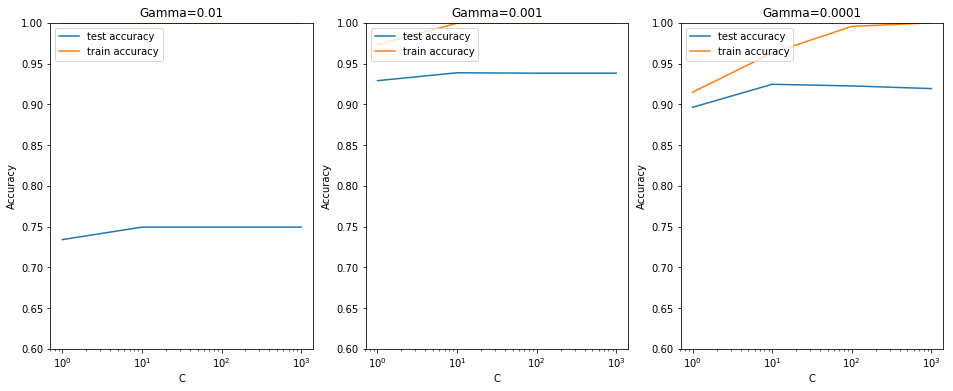

In [24]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [25]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_ 
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9387755102040817 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


## Building and Evaluating the Final Model

In [26]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9428571428571428 

[[253   0   1   0   2   2   0   0   1   0]
 [  0 266   0   0   0   0   1   0   1   0]
 [  2   1 228   4   1   0   1   1   2   1]
 [  0   1  10 230   0   5   0   2   5   1]
 [  0   0   3   0 245   0   2   2   0   6]
 [  0   1   1   8   1 217   1   2   2   2]
 [  2   0   3   0   2   1 230   0   1   0]
 [  0   2   3   0   3   0   0 250   0   7]
 [  3   3   1   5   0   4   0   1 230   4]
 [  1   0   3   3   3   1   0  11   1 227]] 



## Conclusion

#### The accuracy achieved using a non-linear kernel (~0.90) is mush higher than that of a linear one (~0.94).